# Importing Important Libraries 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Save Graphs To Device 

In [2]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Graphs of the Project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Loading Data 

In [3]:
housing = pd.read_csv(r"D:\Hands On ML\House Price Prediction\housing_HandsOnML.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Insights On Data

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Insights:

1) Only 'total_bedrooms' contains some NaN values.

2) All attributes are numerical except for 'ocean_proximity'.

In [5]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Shows total counts, arithematic mean, standard deviation, minimum & maximum value, 1st Quartile(25 %le)
, median(50 %le) and 3rd Quartile(75 %le).

In [7]:
housing.shape

(20640, 10)

The dataset  have 10 columns(attributes) and 20640 rows(fields).

In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Porximity to Ocean of Different Districts

Saving figure Attributes_Histogram_plot


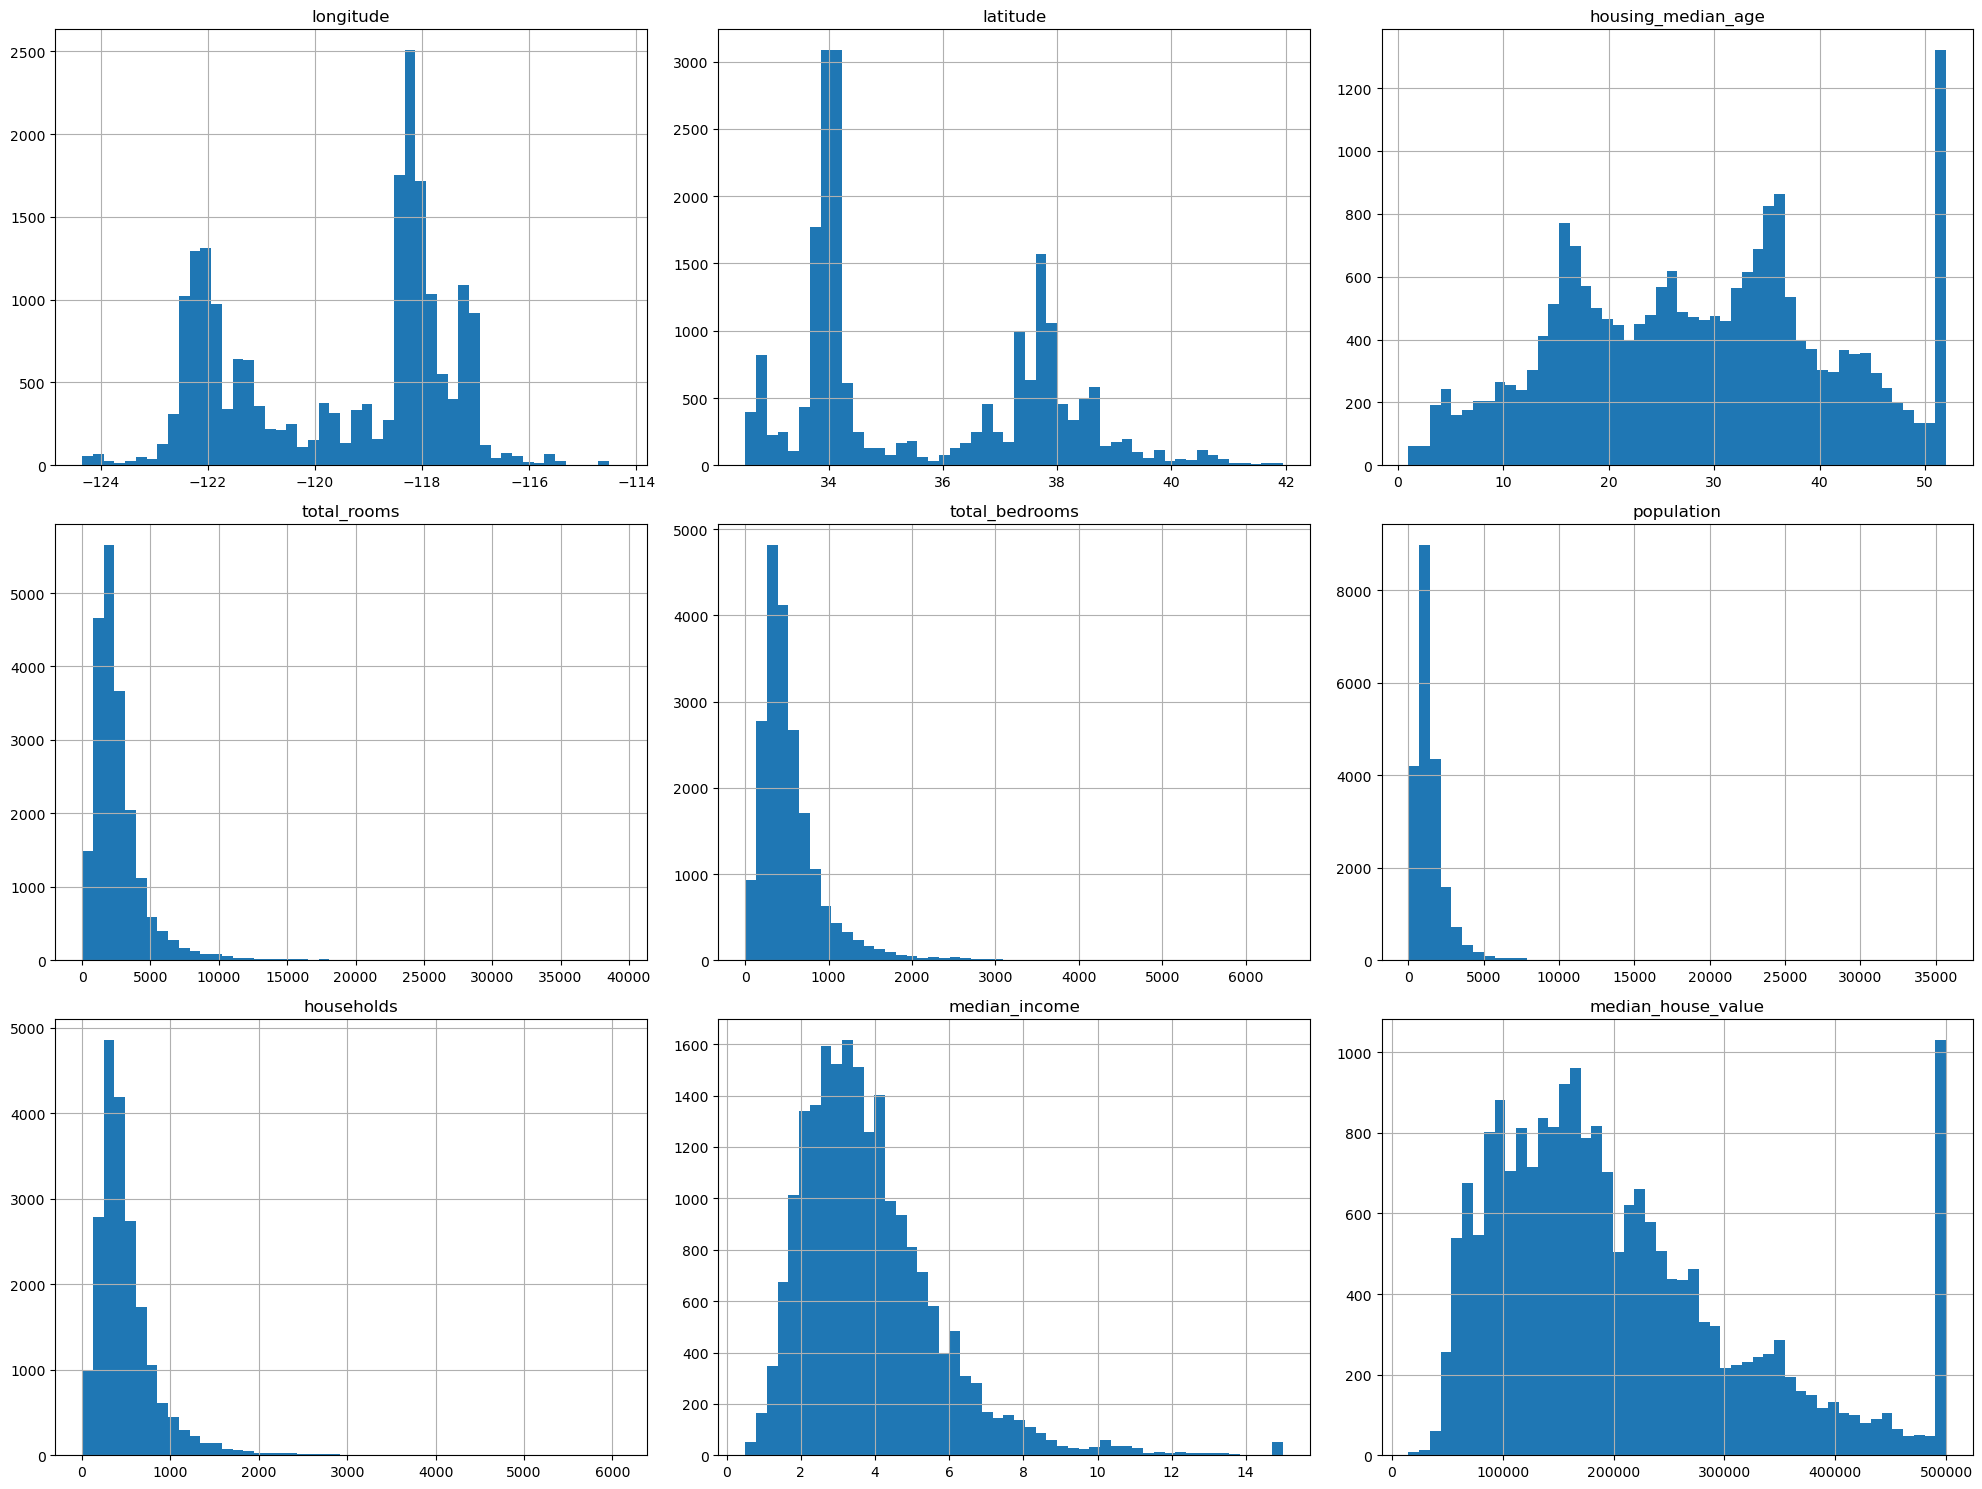

In [9]:
# Histogram of Different Attributes
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))
save_fig('Attributes_Histogram_plot')
plt.show()

# Random Sampling

In [10]:
# splitting Data into Train and Test

def split_train_test(data, test_ratio=0.2):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


### The more convenient and popular way to split data into train and test is using Sci-Kit Learn

In [12]:
from sklearn.model_selection import train_test_split
housing_train, housing_test = train_test_split(housing, test_size=0.2,random_state=42)

## Advantage of Random Sampling

Useful when Dataset is large

## Drawbacks of Random Sampling

Random creates biasedness in data. For example, if the female:male ratio of a certain population is 2:3 and is a sample is created using random sampling then the ratio would not maintain.

# Stratified Sampling

###### The biasedness of random sampling can be avoided using Stratified Sampling. In stratified sampling, the data is divided into subgroups called strata. The sample thus drawn is in such a way that the test set is representative of the whole population.

   ###### In our data, we will be using median_income to stratify data.

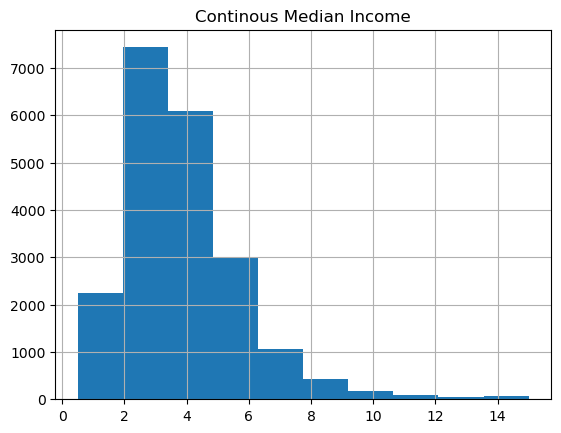

In [13]:
housing["median_income"].hist()
plt.title('Continous Median Income')
plt.show()

###### Since the data is conitnous and we cannot categorize with the help of this, first, we will make it into categorical data.

## Converting Median Income to Categorical Data

##### The following way is mentioned in the book Hand On ML:

                            housing['income_cat'] = np.ceil(housing['median_income']/1.5)
                            housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)
                            

The alternate of this is using pandas cut method.

In [14]:
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0.,1.5,3.,4.5,6.,np.inf],labels=[1,2,3,4,5])

In [15]:
housing.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
20512,-121.55,38.59,36.0,435.0,95.0,285.0,90.0,1.2292,69600.0,INLAND,1
15568,-117.04,33.09,16.0,4677.0,581.0,1902.0,566.0,6.1834,335600.0,<1H OCEAN,5
4047,-118.51,34.14,28.0,6748.0,904.0,2431.0,876.0,12.8879,500001.0,<1H OCEAN,5
18127,-122.02,37.34,30.0,1036.0,151.0,467.0,156.0,6.4480,360600.0,<1H OCEAN,5
3548,-118.61,34.25,16.0,8295.0,1506.0,3903.0,1451.0,5.5111,276600.0,<1H OCEAN,4
323,-122.18,37.74,42.0,541.0,154.0,380.0,123.0,2.3456,83500.0,NEAR BAY,2
14145,-117.08,32.73,36.0,3331.0,643.0,1903.0,622.0,3.6974,122000.0,NEAR OCEAN,3
7440,-118.20,33.94,44.0,1413.0,298.0,1200.0,307.0,3.5125,169300.0,<1H OCEAN,3
3599,-118.50,34.24,34.0,2634.0,412.0,1114.0,423.0,5.9401,315300.0,<1H OCEAN,4
14275,-117.13,32.70,42.0,1210.0,292.0,945.0,258.0,0.8991,78900.0,NEAR OCEAN,1


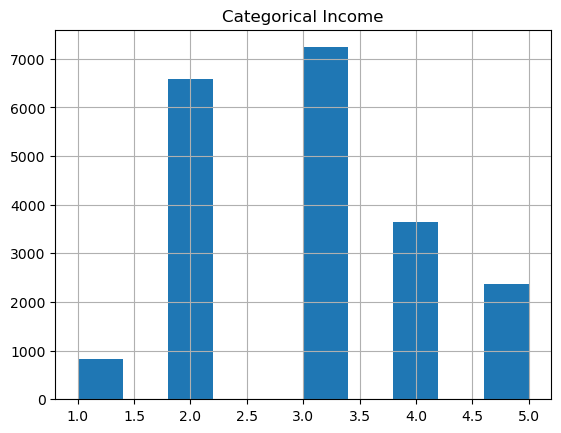

In [16]:
housing['income_cat'].hist()
plt.title('Categorical Income')
plt.show()

###### The continous values of median income has converted into categorical

#### Now, we will apply Sample the population using Stratified Sampling

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# Comparing Biasedness of Stratified Sampling and Random Sampling

In [18]:
#Converting test_set into categorical
test_set['income_cat'] = np.ceil(test_set['median_income'] / 1.5)
test_set['income_cat'].where(test_set['income_cat'] < 5, 5.0, inplace=True)

#For comparison
def income_cat_proportions(data):
    return data['income_cat'].value_counts()/len(data)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props['Rand. % Error'] = 100 * compare_props['Random'] / compare_props['Overall'] - 100
compare_props['Strat. % Error'] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100

compare_props

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5344\3098806287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['income_cat'] = np.ceil(test_set['median_income'] / 1.5)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5344\3098806287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['income_cat'].where(test_set['income_cat'] < 5, 5.0, inplace=True)


,Overall,Stratified,Random,Rand. % Error,Strat. % Error
1.0,0.039826,0.039971,0.040213,0.973236,0.364964
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114341,0.109496,-4.318374,-0.084674


Now, when the Data is split into Train and Test, we will convert it back to original form(without categorical income)

# Converting Data into Original Form

In [19]:
for _ in (strat_train_set, strat_test_set):
    _.drop('income_cat',axis=1,inplace=True)

# Visualizing Data

In [20]:
# Creating a copy of the orginal train data
train_copy = strat_train_set.copy()

Saving figure bad_visualization_plot


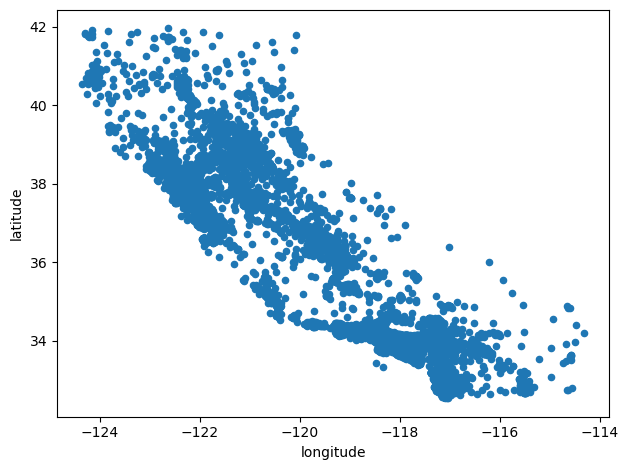

In [21]:
train_copy.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


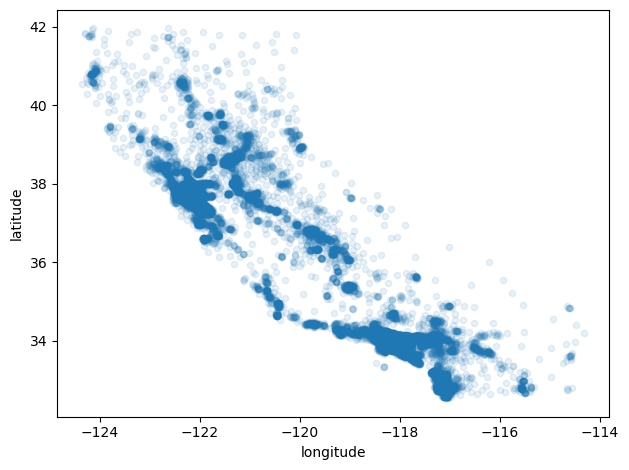

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

The graph plotted above looks very much like California

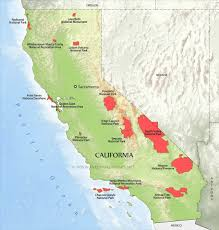

Source:https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.freeworldmaps.net%2Funited-states%2Fcalifornia%2Fmap.html&psig=AOvVaw3b-6dRYaCI9IAp-wnc0Aje&ust=1672779621539000&source=images&cd=vfe&ved=2ahUKEwjV-abq46n8AhUY_jgGHeQ3DY0Qr4kDegQIARBp

Saving figure Housing Price Scatter Plot


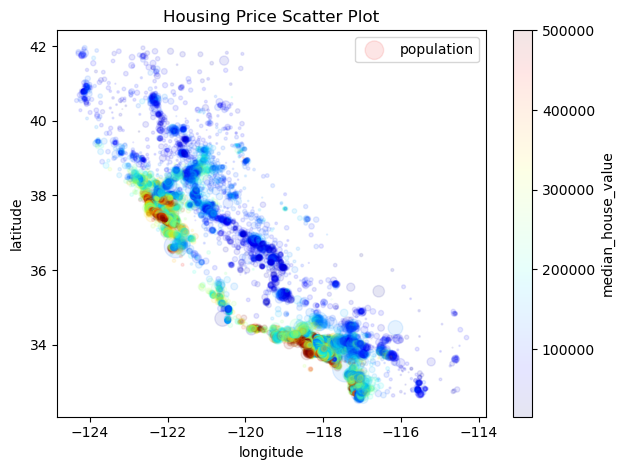

In [23]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, 
             s=housing['population'] / 100,label = 'population', c='median_house_value',
             cmap = plt.get_cmap('jet'),colorbar=True)
plt.legend()
plt.title('Housing Price Scatter Plot')
save_fig('Housing Price Scatter Plot')
plt.show()

The radius of each circle represnts the district's population.

The color represents the price.

# Finding Correlation

<AxesSubplot:>

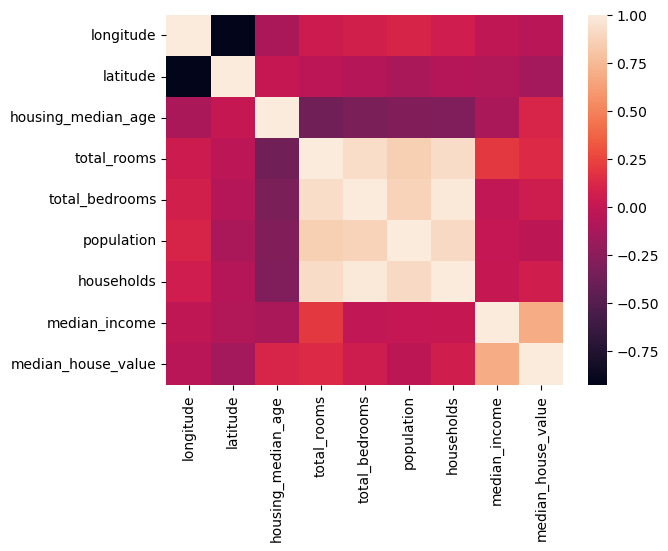

In [24]:
corr_matrix = housing.corr()
sns.heatmap(corr_matrix)

In [25]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Saving figure Correlation Graph


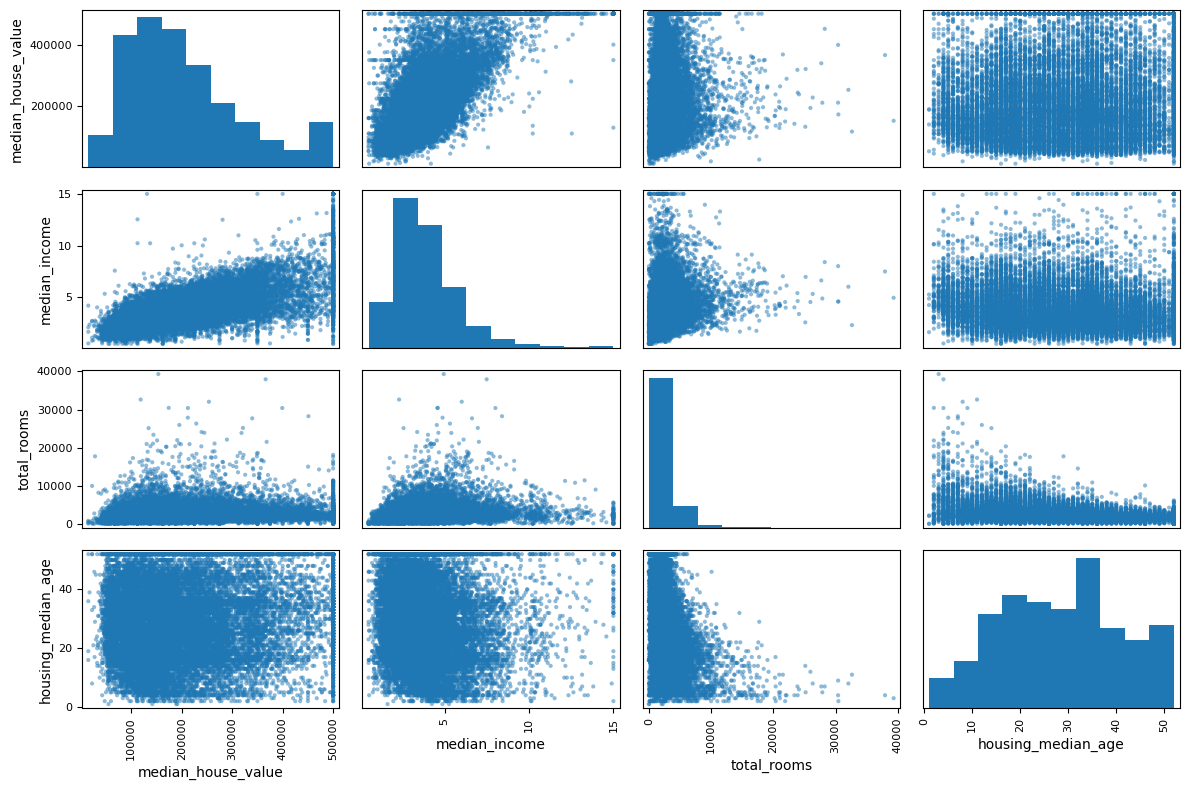

In [26]:
# Scatter Matrix plots correlation graph of each attributes with one another
from pandas.plotting import scatter_matrix

attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))
save_fig("Correlation Graph")

#### median_house_value and median_income shows high positive correlation. So we plot its graph separately.

Saving figure income_vs_house_value


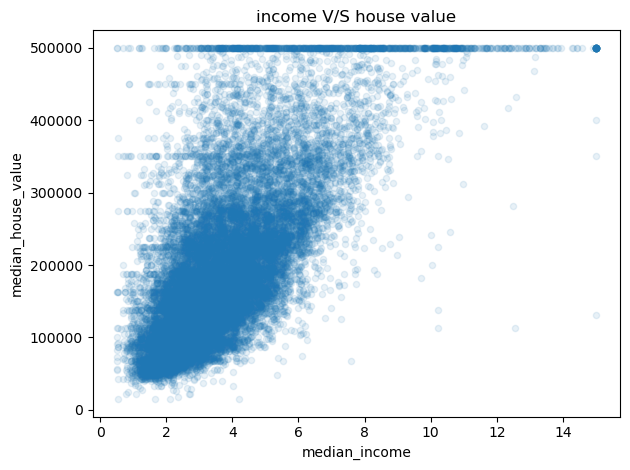

In [27]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.title('income V/S house value')
save_fig('income_vs_house_value')

### extracting more information from the attributes. Or we can say, making attributes more useful.

In [28]:
train_copy['rooms_per_household'] = train_copy['total_rooms'] / train_copy['households']
train_copy['bedrooms_per_room'] = train_copy['total_bedrooms'] / train_copy['total_rooms']
train_copy['population_per_household'] = train_copy['population'] / train_copy['households']

In [29]:
corr_matrix = train_copy.corr()

<AxesSubplot:>

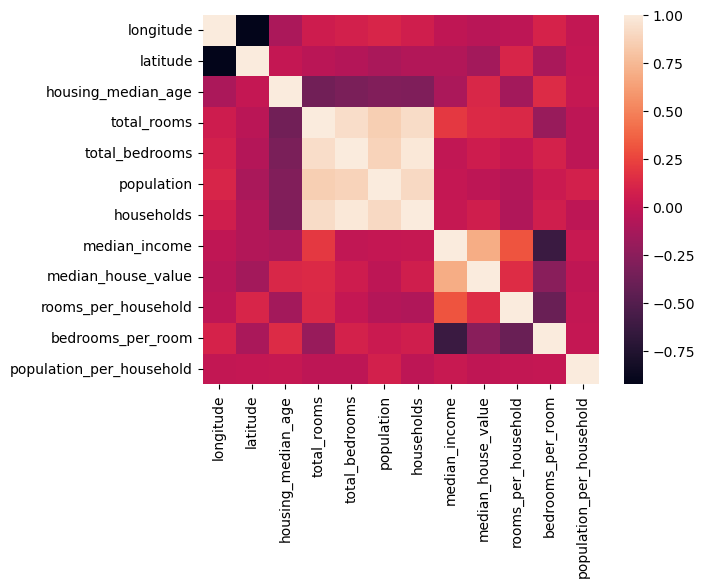

In [30]:
sns.heatmap(corr_matrix)

In [31]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

rooms_per_household shows positive correlation with median_house_value. Which means, more the number of rooms in a househol, higher will be its value.

Also, bedrooms_per_room shows negative correlation with median_house_value. Which means, more the number of bedrooms compared to number of total rooms, lesser will be the value of that house.

# Preparing Data for ML 

In [32]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Data Cleaning

###### Pandas provide 3 ways to deal with missing values:
                1) Remove the rows with missing values:       pd.dropna()
                2) Remove the attribute with missing values:  pd.drop(attribute_name, axis = 1)
                3) Fill it with zero, mean or median:         pd.fillna(zero/median/mean, inplace=True)

Scikit-Learn provides a very convenient way to deal with missing values in a dataset using the same way as 3

#### Using  Scikit - Learn for data cleaning

In [33]:
try:
    from sklearn.impute import SimpleImputer      #For new version of Scikit
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer
    
imputer = SimpleImputer(strategy='median')

#Removing text attribute because median can only be calculated on numerical attributes
housing_num = housing.drop('ocean_proximity', axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [34]:
# It stores mean in statistics_ instance variable
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [35]:
# Checking if the median is same or not
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

###### Transforming Trainig Set:

In [36]:
X = imputer.transform(housing_num)

In [37]:
housing_tr = pd.DataFrame(X, columns= housing_num.columns, index = housing_num.index)

In [38]:
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

###### Scikit-Learns have a LabelEncoder method to deal with text attribute. It converts text data into numerical labels so we can easily work on it.

###### Below code is given in the book:

                            from sklearn.preprocessing import LabelEncoder
                            encoder = LabelEncoder()
                            housing_cat = housing['ocean_proximity']
                            housing_cat_encoded = encoder.fit_transform(housing_cat)
                            print('Label of the Ocean Proximity:', housing_cat_encoded)
                            print('Mapped attributes of Ocean Proximity:', encoder.classes_)

###### But OrdinalEncoder introduced in the latest version of the Scikit-Learn is preferable since it plays well with pipelines.

In [39]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
housing_cat = housing[['ocean_proximity']]               # we need 2D data for OrdinalEncoder
housing_cat_encoded = encoder.fit_transform(housing_cat)

print('Labels of transformed data: \n',housing_cat_encoded[:10])
print('categories of transformed data: \n', encoder.categories_)

Labels of transformed data: 
 [[1.]
 [4.]
 [1.]
 [4.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]]
categories of transformed data: 
 [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


##### one-hot encoding

A problem with the above labelled data is that it will assumed two nearby values are more similiar than two distant values.
Two fix this issue, we can create a binary attribute per category: one attribute equals to 1 when the category is "<1H Ocean" and 0 otherwise. This is called one-hot encoding, because only one attribute will be equal to 1(hot), while others will be 0(cold).

In [40]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat)

housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [41]:
# Converting sparse matrix of OneHotEncoder to array
housing_cat_1hot_array = housing_cat_1hot.toarray()

housing_cat_1hot_array

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Alternatively, we can set sparse=False when creating OneHotEncoder

In [42]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
housing_cat_1hot_array = encoder.fit_transform(housing_cat)
housing_cat_1hot_array

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

##### Custom Transformer

Sometimes, we have to create our custom tranformer for data cleaning puporse. It can be done in the following way.

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin
# TranformerMixin: Helps in fit, transform and fit_transform methods
# BaseEstimator: Helps in get_params and set_params

room_ix, bedrooms_ix, population_ix, household_ix  = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, bedrooms_per_room = True):                    # no *args and *kwargs
        self.bedrooms_per_room = bedrooms_per_room
        
    def fit(self, X, y=None):
        return self                            # Nothing else to do. It is handle by TranformerMixin
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, room_ix] / X[:,household_ix]
        population_per_household = X[:,population_ix] / X[:,household_ix]
        if self.bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, room_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        

attr_adder = CombinedAttributesAdder(bedrooms_per_room = False)
housing_extra_atr = attr_adder.transform(housing.values)

In [44]:
housing_extra_atr = pd.DataFrame(housing_extra_atr, 
                                 columns = list(housing.columns) +["rooms_per_household", "population_per_household"] , 
                                 index = housing.index)
housing_extra_atr.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
13873,-117.31,34.39,15.0,1703.0,273.0,847.0,266.0,3.7917,INLAND,6.402256,3.184211
19901,-119.29,36.32,35.0,1898.0,481.0,1123.0,433.0,1.1419,INLAND,4.383372,2.593533
13870,-117.32,34.41,13.0,2032.0,348.0,1038.0,344.0,4.2891,INLAND,5.906977,3.017442
10241,-117.88,33.89,17.0,3218.0,923.0,1701.0,824.0,3.6946,<1H OCEAN,3.90534,2.06432
1380,-122.09,38.0,6.0,10191.0,1882.0,4377.0,1789.0,5.2015,NEAR BAY,5.696478,2.446618


### Feature Scaling

Most of the ML algorithms doesn't perform well when input attributes have different scales.There are 2 common ways to get all attribiutes to have same scale:

1) Min-Max Scaling:
                   
                   In this method, values are shifted and rescaled so they end up        ranging from 0 to 1. It is done by substracting the min value and dividing by the difference of max and min. Scikit-Learn provides MinMaxScaler for this purpose.
                                   from sklearn.preprocessing import MinMaxScaler
                                   
2) Standardization: 
                
                    It first divide value by mean(so new mean is 0) and then divide it by the variance(so new variance is 1). SciKit provides StandardScaler for the following tranformation.
                                   from sklearn.preprocessing import StandardScaler

###### Difference between Min-Max Scaling and Standardization

1) Standardization bound values to specific range. But Min-Max Scaling does.

2) Standardization is much less affected by outliers compared to Min-Max Scaling.

#### Combining all the transformation in one
Scikit-Lean provides pipeline class to help with the execution of tranformers in right order.

In [45]:
# this pipeline is only for numerical data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Creating pipeline for all numerical preprocessing
num_pipeline  = Pipeline([('imputer', SimpleImputer(strategy='median')), 
                          ('atr_adder', CombinedAttributesAdder()), 
                         ('std_scaler', StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [46]:
# This is the full pipeline
from sklearn.compose import ColumnTransformer

num_atr = list(housing_num)
cat_atr = ['ocean_proximity']
full_pipeline = ColumnTransformer([('num', num_pipeline, num_atr), ('encoder', OneHotEncoder(), cat_atr)])

housing_prepared = full_pipeline.fit_transform(housing)

### Creating a custom Transformer for Handling Pandas DataFrame without Converting to Numpy arrays

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    """Converts Pandas DataFrame to Numpy array"""
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values
    

In [48]:
#Adding DataFrameSelector to Pipeline

num_atr = list(housing_num)
cat_atr = ['ocean_proximity']

num_pipeline = Pipeline([('selector', DataFrameSelector(num_atr)), 
                         ('imputer', SimpleImputer(strategy = 'median')), 
                        ('atr_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler())])

cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_atr)), 
                     ('encoder', OneHotEncoder(sparse=False))])


In [49]:
# Combining two pipelines

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[('num_pipeline', num_pipeline), 
                                               ('cat_pipeline', cat_pipeline)])

In [50]:
# Perfroming preprocessing using Full Pipeline

housing_prepared = full_pipeline.fit_transform(housing)

print(housing_prepared)
print('\n \n Shape of housing_prepared:', housing_prepared.shape)

[[-0.94135046  1.34743822  0.02756357 ...  0.          0.
   0.        ]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.          0.
   1.        ]
 [ 0.26758118 -0.1259716   1.22045984 ...  0.          0.
   0.        ]
 ...
 [-1.5707942   1.31001828  1.53856552 ...  0.          0.
   0.        ]
 [-1.56080303  1.2492109  -1.1653327  ...  0.          0.
   0.        ]
 [-1.28105026  2.02567448 -0.13148926 ...  0.          0.
   0.        ]]

 
 Shape of housing_prepared: (16512, 16)


###### The result is same with ColumnTransformer

    code:
            from sklearn.compose import ColumnTranformer
            full_pipeline = ColumnTransformer([('num', num_pipeline, num_atr), ('cat', cat_pipeline', cat_atr)])
            
            housing_prepared = full_pipeline.fit_transform(housing)

# Training a Model

## Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [52]:
print("Predicted values:", lin_reg.predict(housing_prepared[:5]))
print()
print("Actual values:", list(housing_labels[:5]))

Predicted values: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]

Actual values: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


###### Clearly, there's a lot difference between predicted and actual values

#### Calculating RMSE

In [53]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

print("Root Mean Squared Error:", lin_rmse)

Root Mean Squared Error: 68627.87390018745


###### High value of RMSE signify that the model is under fit.

#### Calculating MAE

In [54]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)

print("Mean Absolute Error:", lin_mae)

Mean Absolute Error: 49438.66860915801


## Decision Trees

In [55]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

tree_mae = mean_absolute_error(housing_labels, housing_predictions)

print("Root Mean Squared Error:", tree_rmse)
print("Mean Absolute Error:", tree_mae)

Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0


## Cross-Validation
One way to cross-validate is splitting the train data into train set and validate set, and after training evaluating on the validate set.

Another way is to use Scikit-Learn's cross-validation feature. It performs K-fold cross validation.
                
                k-fold cross validation: It randomly splits the trainig data into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree Model 10 times picking a different fold for evaluation every time and training on the other 9 fold. The result is an array containing the 10 evaluation scores.

### Of Decision Tree

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)          # We add minus(-) sign before scores bcz scores have -ve values

In [57]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard Deviation: 2914.035468468928


### Of Linear Regression

In [58]:
lin_reg_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                                  scoring='neg_mean_squared_error', cv=10)
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)
display_scores(lin_reg_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard Deviation: 2880.328209818068


###### High value of Cross-Validation of Decision Tree signify data is over fit.

## Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10,random_state=42)
forest_reg.fit(housing_prepared,housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)

forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

forest_mae = mean_absolute_error(housing_labels, housing_predictions)

print("Root Mean Squared Error:", forest_rmse)
print("Mean Absolute Error:", forest_mae)

Root Mean Squared Error: 22413.454658589766
Mean Absolute Error: 13785.054560319768


In [60]:
# Cross-Validation of Random Forest
forest_scores = cross_val_score(forest_reg, housing_prepared,housing_labels,
                               scoring='neg_mean_squared_error', cv=10)
forest_score_rmse = np.sqrt(-forest_scores)
display_scores(forest_score_rmse)

Scores: [53519.05518628 50467.33817051 48924.16513902 53771.72056856
 50810.90996358 54876.09682033 56012.79985518 52256.88927227
 51527.73185039 55762.56008531]
Mean: 52792.92669114079
Standard Deviation: 2262.8151900582


## Support Vector Regression

In [61]:
from sklearn.svm import SVR

svm_reg = SVR(kernel = 'linear')
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)

svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)

svm_mae = mean_absolute_error(housing_labels, housing_predictions)

print("Root Mean Squared Error:", svm_rmse)
print("Mean Absolute Error:", svm_mae)

Root Mean Squared Error: 111095.06635291968
Mean Absolute Error: 81843.53472284484


In [62]:
# Cross-Validation of Support Vector Regression
svm_scores = cross_val_score(svm_reg, housing_prepared, housing_labels,
                            scoring='neg_mean_squared_error', cv=10)
svm_scores_rmse = np.sqrt(-svm_scores)
display_scores(svm_scores_rmse)

Scores: [110518.40356474 112956.5486846  106998.56227015 113590.97575445
 107782.52294955 116063.7781669  113279.08892636 111836.81295967
 113168.96643781 111945.40954593]
Mean: 111814.1069260169
Standard Deviation: 2600.8402690892563


# Tuning The Model

## Grid Search

It returns best hyperparameters and estimator for the Model

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12(3x4) combinations of hyperparameters
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    # the try 6(2x3) combinations of hyperparameters
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor(random_state=42)

# train across 5 folds, that's a total of (12+6)*5 = 90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

###### The Best hyperparameter combination found:

In [64]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

###### Best Estimator Found:

In [65]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

###### Evaluation Scores of each hyperparameter

In [66]:
cvres = grid_search.cv_results_

for mean, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [67]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.042567,0.005751,0.005596,0.005317,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.133196,0.004288,0.006258,0.007664,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,0.417107,0.010288,0.022889,0.007341,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,9,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.068973,0.006225,0.003141,0.006283,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.229604,0.004834,0.009421,0.004012,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06
5,0.701553,0.009015,0.023492,0.002301,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.093617,0.002733,0.003121,0.000677,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,13,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,0.312854,0.008749,0.004579,0.003789,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.622099e+09,-2.669655e+09,...,-2.654240e+09,6.967978e+07,5,-4.939906e+08,-5.145996e+08,-5.023512e+08,-4.959467e+08,-5.147087e+08,-5.043194e+08,8.880106e+06
8,0.957042,0.019052,0.023594,0.003983,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.123354,0.003958,0.001200,0.001470,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,14,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


## Randomized Search

When the hyperparameter space is large, it is often preferred to use RandomizedSearchCV instead. It can be used in the same way as GridSearchCV but instead of trying out all  possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration.

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018B048E0820>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018B0490FB80>},
                   random_state=42, scoring='neg_mean_squared_error')

In [69]:
cvres = rnd_search.cv_results_

for mean, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


## Analyzing Attributes of a Model

In [70]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [71]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(housing['ocean_proximity'].unique())
attributes = num_atr + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'NEAR OCEAN'),
 (0.10703132208204355, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887772, 'households'),
 (0.006792660074259966, 'INLAND'),
 (0.0030281610628962747, 'ISLAND'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, '<1H OCEAN')]

# Final Model

In [77]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_mae = mean_absolute_error(y_test, final_predictions)

print("Root Mean Squared Error:", final_rmse)
print("Mean Absolute Error:", final_mae)

Root Mean Squared Error: 60681.17658269993
Mean Absolute Error: 43429.838775839795
